https://blog.csdn.net/weixin_42296411/article/details/80901080

In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

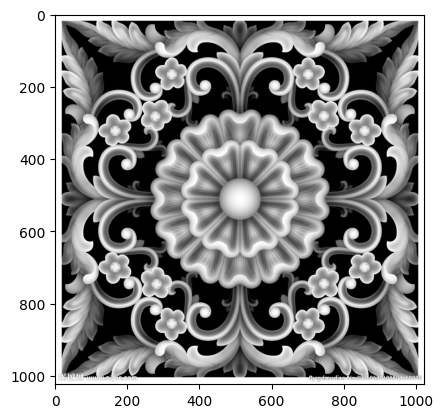

In [2]:
image = cv2.imread("../images/gray.jpg", flags=0)
plt.imshow(image, cmap="gray")

# cv2.threshold

type:
- THRESH_BINARY
- THRESH_BINARY_INV      BINARY的负片
- THRESH_TRUNC           设置上限，大于上限的等于上限
- THRESH_TOZERO          大于上限不变,小于下限的变为0,如果限制为0,则可以让最小值为0
- THRESH_TOZERO_INV      TOZERO的负片
- THRESH_MASK
- THRESH_OTSU	        不支持32位
- THRESH_TRIANGLE	    不支持32位

<img src="11_threshold.png" alt="11_threshold" style="zoom:60%;" />

150.0


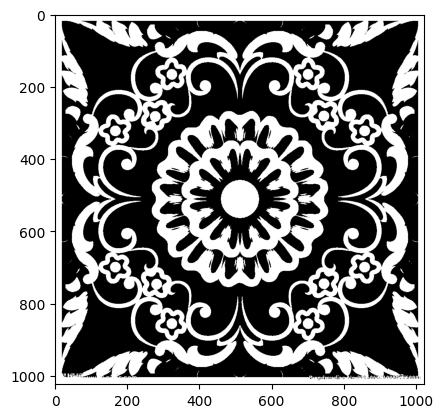

In [4]:
retval, binary = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_BINARY,
)
print(retval)
plt.imshow(binary, cmap="gray")

150.0


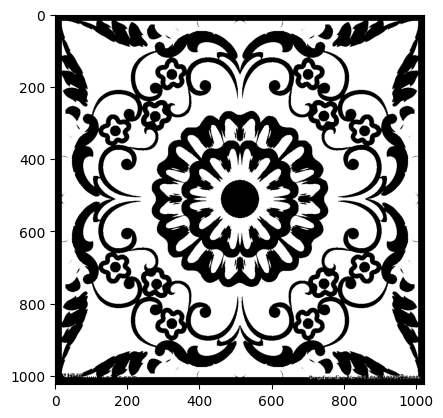

In [5]:
retval, binary_inv = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_BINARY_INV,
)
print(retval)
plt.imshow(binary_inv, cmap="gray")

150.0


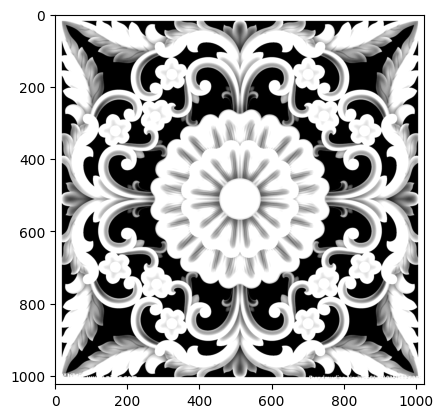

In [ ]:
retval, trunc = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_TRUNC,
)
print(retval)
plt.imshow(trunc, cmap="gray")

150.0


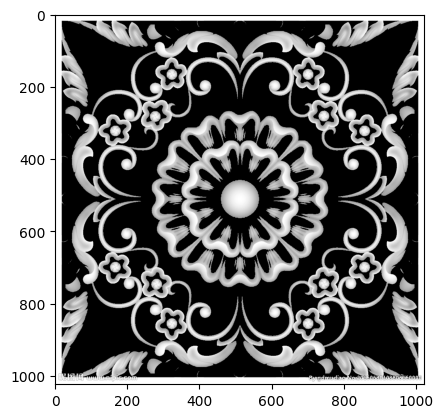

In [ ]:
retval, tozero = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_TOZERO,
)
print(retval)
plt.imshow(tozero, cmap="gray")

150.0


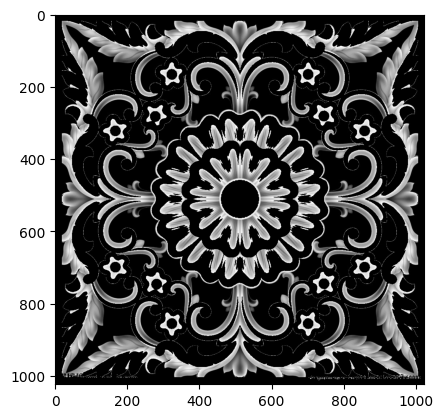

In [ ]:
retval, tozero_inv = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_TOZERO_INV,
)
print(retval)
plt.imshow(tozero_inv, cmap="gray")

112.0


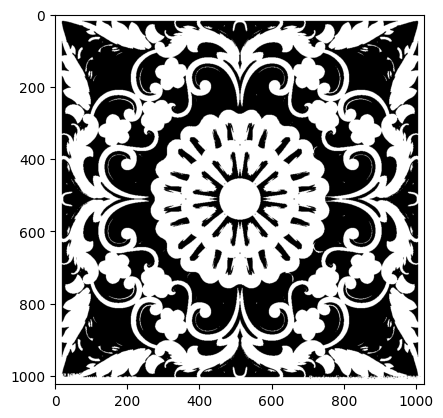

In [7]:
retval, otsu = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_OTSU,
)
print(retval)
plt.imshow(otsu, cmap="gray")

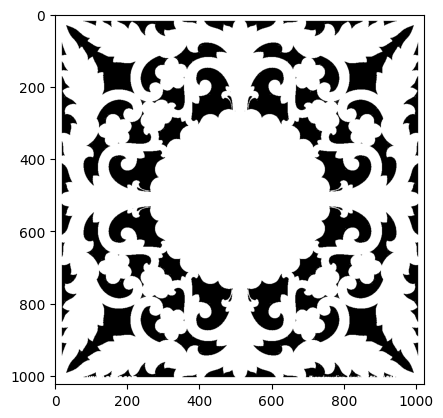

In [ ]:
retval, triangle = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_TRIANGLE,
)
plt.imshow(triangle, cmap="gray")

150.0


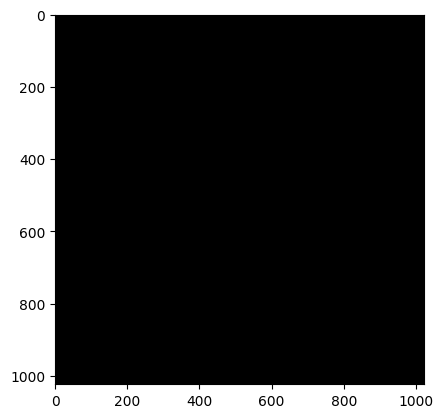

In [ ]:
retval, mask = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_MASK,
)
print(retval)
plt.imshow(mask, cmap="gray")

# cv2.adaptiveThreshold

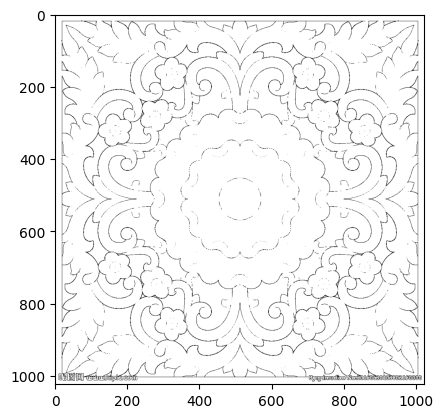

In [18]:
mean = cv2.adaptiveThreshold(
    src=image,
    maxValue=55,                                # 给像素赋予的满足阈值类型的非零值
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,  # 用于指定自适应阈值的算法，具体可以查看adaptiveThresholdTypes给出的具体内容，简要内容如下：
                                                #   ADAPTIVE_THRESH_MEAN_C: 阈值时由blockSize确定的像素(x, y)在blockSize x blockSize范围内的邻域像素值减参数C得到的平均值
                                                #   ADAPTIVE_THRESH_GAUSSIAN_C: 阈值是blockSize x blockSize领域范围内减去C后的加权和。默认的sigma用于指定的blockSize，可通过getGaussianKernel查看详细信息。
    thresholdType=cv2.THRESH_BINARY,            # 阈值类型，其取值有两种类型分别是 THRESH_BINARY,THRESH_BINARY_INV
    blockSize=3,                                # 用于计算阈值大小的像素邻域尺寸，取值为3\5\7……
    C=10,                                       # 自适应阈值算法中减去的常数值，通常是正数，在极少情况下式0或负值
)
plt.imshow(mean, cmap="gray")

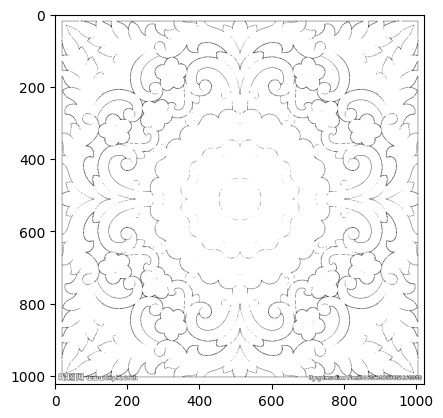

In [19]:
gaussian = cv2.adaptiveThreshold(
    src=image,
    maxValue=55,                                    # 给像素赋予的满足阈值类型的非零值
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 用于指定自适应阈值的算法，具体可以查看adaptiveThresholdTypes给出的具体内容，简要内容如下：
                                                    #   ADAPTIVE_THRESH_MEAN_C: 阈值时由blockSize确定的像素(x, y)在blockSize x blockSize范围内的邻域像素值减参数C得到的平均值
                                                    #   ADAPTIVE_THRESH_GAUSSIAN_C: 阈值是blockSize x blockSize领域范围内减去C后的加权和。默认的sigma用于指定的blockSize，可通过getGaussianKernel查看详细信息。
    thresholdType=cv2.THRESH_BINARY,                # 阈值类型，其取值有两种类型分别是 THRESH_BINARY,THRESH_BINARY_INV
    blockSize=3,                                    # 用于计算阈值大小的像素邻域尺寸，取值为3\5\7……
    C=10,                                           # 自适应阈值算法中减去的常数值，通常是正数，在极少情况下式0或负值
)
plt.imshow(gaussian, cmap="gray")

# 缩放范围

归一化就是把要处理的数据经过某种算法的处理限制在所需要的范围内。

首先归一化是为了后面数据处理的方便，其次归一化能够保证程序运行时收敛加快。

归一化的具体作用是归纳同意样本的统计分布性，归一化在0-1之间是统计的概率分布，

归一化在某个区间上是统计的坐标分布，在机器学习算法的数据预处理阶段，归一化也是非常重要的步骤。

## normalize

norm_type = NORM_L2
- NORM_INF: 归一化数组的C-范数(绝对值的最大值)
- NORM_L1: 归一化数组的L1-范数(绝对值的和)
- NORM_L2: 归一化数组的L2-范数(欧几里得)
- NORM_MINMAX: 数组的数值被平移或缩放到一个指定的范围，线性归一化，一般较常用

50.0 200.0


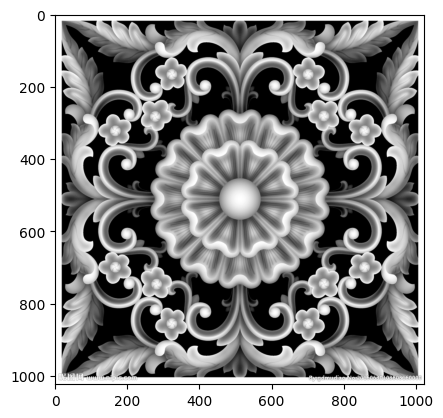

In [3]:
image_normalize1 = cv2.normalize(
    src=image,
    dst=None,
    alpha=50,   # 缩放到50~200之间
    beta=200,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_32FC1,     # 当该参数为负数时，输出数组的类型与输入数组的类型相同
)
# 线性缩放
print(image_normalize1.min(), image_normalize1.max())
plt.imshow(image_normalize1, cmap="gray")

### 手动缩放

50.0 200.0


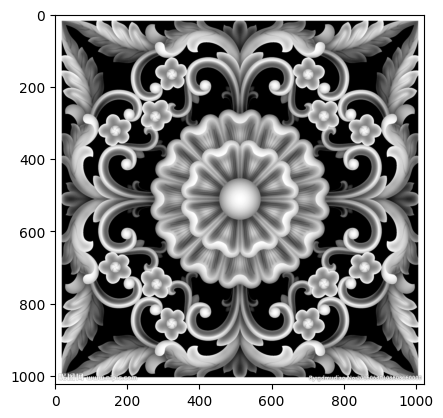

In [17]:
image_normalize_manual1 = image / 255 * (200 - 50) + 50 # 先归一化,再调整scale,最后加上bias
print(image_normalize_manual1.min(), image_normalize_manual1.max())
plt.imshow(image_normalize_manual1, cmap="gray")

## 归一化

0.0 1.0


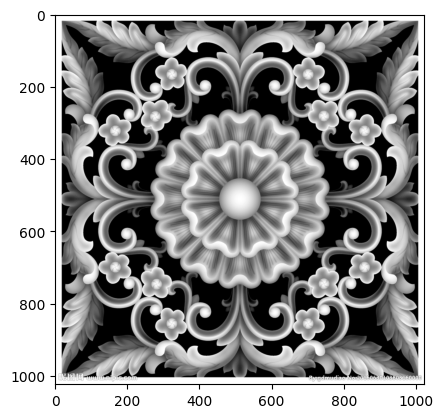

In [4]:
image_normalize2 = cv2.normalize(
    src=image,
    dst=None,
    alpha=0,    # 缩放到0~1之间
    beta=1,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_32FC1,   # 当该参数为负数时，输出数组的类型与输入数组的类型相同
)
# 线性缩放
print(image_normalize2.min(), image_normalize2.max())
plt.imshow(image_normalize2, cmap="gray")

### 手动归一化

0.0 1.0


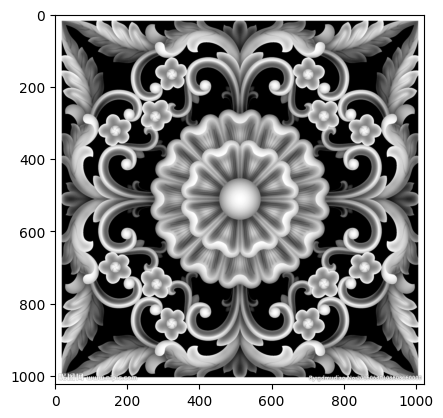

In [16]:
image_normalize_manual1 = image / 255
print(image_normalize_manual1.min(), image_normalize_manual1.max())
plt.imshow(image_normalize_manual1, cmap="gray")

0 255


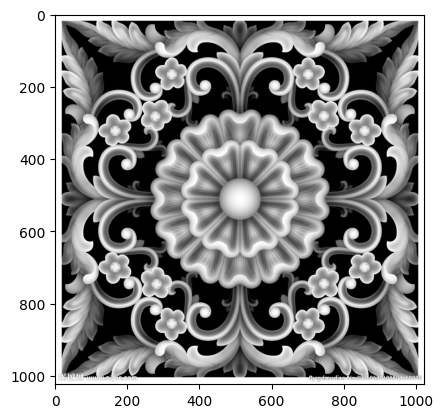

In [6]:
image_normalize3 = cv2.normalize(
    src=image_normalize2,
    dst=None,
    alpha=0,
    beta=255,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8UC1,   # 当该参数为负数时，输出数组的类型与输入数组的类型相同
)
# 线性缩放
print(image_normalize3.min(), image_normalize3.max())
plt.imshow(image_normalize3, cmap="gray")